# INST0060: Code-base for fisher's LDA

Follow the below notebook to compile the project

### Importing

Importing the custom written libraries and others neccesary to run the notebook and the dataset

In [2]:
#custom libraries

from functions import logreg, knn, randfor, use_for_models as ufm

import fomlads.evaluate.eval_regression as fomlads

#import pandas and numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

#import sklearn libraries

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

%matplotlib inline

In [3]:
#read the dataset
dataset = pd.read_csv('Data/Used Dataset.csv')

### Partition the dataset into inputs, targets + training, validating folds + testing

In [4]:
# Produce inputs and targets from dataset

inputs = dataset.iloc[:, 0:-1].to_numpy()
targets = dataset['track_genre'].to_numpy()


In [5]:
# Split the dataset into training + validation data and testing data

train_filter, test_filter = fomlads.train_and_test_filter(len(dataset))

train_validation_inputs, train_validation_targets, test_inputs, test_targets = fomlads.train_and_test_partition(inputs, targets, train_filter, test_filter)


In [6]:
# Partition the training + validation data into training data and validation data

number_of_folds = 4 #specify number of folds on training dataset
random_seed = 2023 #set random seed to ensure reproducability
    
train_inputs, train_targets, validation_inputs, validation_targets = ufm.train_and_validation_inputs_targets(inputs,targets, number_of_folds, random_seed)


## Train models (sum of expected runtime ~4 mins) 

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

mean_accuracies = []

components = (1,2,3,4)

for k in components:
    accuracy = []
    for i in range(number_of_folds):
                lda = LinearDiscriminantAnalysis(solver = 'eigen', n_components = k)
                lda.fit(train_inputs[i], train_targets[i])
                predict_targets = lda.predict(validation_inputs[i])
                accuracy_i = accuracy_score(validation_targets[i], predict_targets)
                accuracy.append(accuracy_i)
    mean_accuracies.append(np.mean(accuracy))

In [8]:
accuracy
#mean_accuracies

[0.7490703028156543,
 0.7426952364087126,
 0.7437577474765362,
 0.7387993624933593]

In [9]:
mean_accuracies = []

components = (1,2,3,4)
shrinkage_n = np.linspace(0,1e-5,5)

for k in shrinkage_n:
    accuracy = []
    for i in range(number_of_folds):
                lda = LinearDiscriminantAnalysis(solver = 'eigen', shrinkage = k, n_components = 2)
                lda.fit(train_inputs[i], train_targets[i])
                predict_targets = lda.predict(validation_inputs[i])
                accuracy_i = accuracy_score(validation_targets[i], predict_targets)
                accuracy.append(accuracy_i)
    mean_accuracies.append(np.mean(accuracy))

In [10]:
print(np.argmax(mean_accuracies))
shrinkage_n[95]
plt.plot(mean_accuracies)
plt.show()

0


IndexError: index 95 is out of bounds for axis 0 with size 5

### Refitting

In [ ]:
#refit the models



### Make predictions on unseen data

In [ ]:
#run models on test data
predict_targets = [0,0,0]

### Accuracy (this is to be made more comprehensive)

In [ ]:
#print accuracies

for i in range(3):
   print("Accuracy: ",accuracy_score(test_targets, predict_targets[i]))

In [11]:
for i in range(3):
   print("F1_score: ",f1_score(test_targets, predict_targets[i],average='macro'))

TypeError: Singleton array 'Country' cannot be considered a valid collection.

In [12]:
X_grid

NameError: name 'X_grid' is not defined

In [13]:
yy.shape

NameError: name 'yy' is not defined

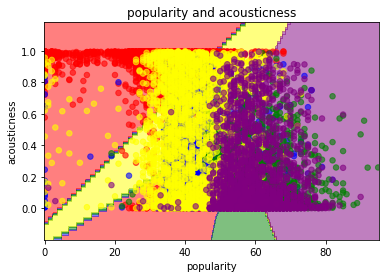

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assume that you have X (features) and y (labels) for training data, and X_test (features) for testing data
# Also assuming that X has k features

X = train_validation_inputs
X_test = test_inputs
y = train_validation_targets
y_numarated = np.unique(y,return_inverse= True)[1]

feature1 = 0
feature2 = 1


# Selecting two features
X_2d = X[:, [feature1, feature2]] # select first two features

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_2d, y)

# use the model to predict the labels of the test data
predictions = lda.predict(X_test[:, [0, 1]])

# Get the min and max values for the features
x_min, x_max = X_2d[:, 0].min() - 0.2, X_2d[:, 0].max() + 0.2
y_min, y_max = X_2d[:, 1].min() - 0.2, X_2d[:, 1].max() + 0.2

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03),
                     np.arange(y_min, y_max, 0.03))

# Flatten the mesh grid
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Make predictions using the model
predictions = lda.predict(X_grid)

# Reshape the predictions to the original shape
predictions = predictions.reshape(xx.shape)
predictions_numerated = np.unique(predictions,return_inverse= True)[1].reshape(predictions.shape)

#color palette
colors = ['Red','Blue','Green','Yellow','Purple']

# Draw the decision boundaries
plt.contourf(xx, yy, predictions_numerated, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)



# Plot the training points
for i in np.unique(y):
    plt.scatter(X_2d[y==i, 0], X_2d[y==i, 1], c=y_numarated[y==i], cmap=matplotlib.colors.ListedColormap(colors[int(np.where(np.unique(y)==i)[0])]), s = 30, alpha = 0.6, label=i)
    
plt.rcParams['figure.figsize'] = [15, 15]

# Display the plot
plt.title('{} and {}'.format(dataset.columns[feature1],dataset.columns[feature2]))
#plt.gca().legend()
plt.xlabel(dataset.columns[feature1])
plt.ylabel(dataset.columns[feature2])
plt.show()


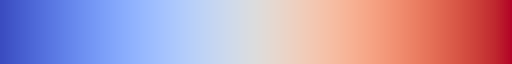

In [15]:
plt.cm.coolwarm

In [16]:
predictions_numerated.reshape(30,980)

ValueError: cannot reshape array of size 149507 into shape (30,980)

In [17]:
np.unique(y,return_inverse= True)[1]

array([3, 3, 3, ..., 2, 2, 2])

In [18]:
predictions_numerated 

array([[3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4],
       ...,
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4]])

In [19]:
np.unique(predictions)

array(['Classical', 'Country', 'Hip-Hop', 'Jazz', 'Rock'], dtype='<U9')

In [20]:
from matplotlib import cm
print(cm.coolwarm(0.5))

(0.8674276350862745, 0.864376599772549, 0.8626024620196079, 1.0)


In [21]:
dataset.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'track_genre'],
      dtype='object')

In [22]:
X_2d[:, 0]

array([63., 39., 38., ..., 57., 55., 65.])

In [23]:
dataset.groupby(['track_genre']).count()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
track_genre,,,,,,,,,,,,,
Classical,4500,4500,4500,4500,4500,4500,4500,4500,4500,4500,4500,4500,4500
Country,4486,4486,4486,4486,4486,4486,4486,4486,4486,4486,4486,4486,4486
Hip-Hop,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
Jazz,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
Rock,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561


In [24]:
X_2d[y=='Jazz',0].shape

(2211,)

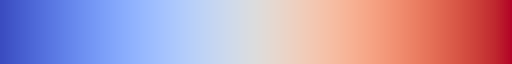

In [25]:
plt.cm.coolwarm

In [26]:
import itertools



def unique_combinations(elements: list[k]) -> list[tuple[k, k]]:
    
    return list(itertools.combinations(elements, 2))


In [27]:
itertools.combinations([0,1,2,3,4,5,6,7,8,9,10,11,12], 2)

In [ ]:
ufm.plot_decision_boundary(dataset,train_validation_inputs,train_validation_targets,test_inputs, lda,3, 7)
            